In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Chargement des données
data = pd.read_csv("/Users/hadilneji/Downloads/pollution.csv", sep=';', parse_dates=['date'])

In [5]:
# Suppression colonnes inutiles
data = data.drop(columns=['CO', 'NOX', 'date'])

In [6]:
# Encodage de la variable catégorielle 'ville'
le = LabelEncoder()
data['ville'] = le.fit_transform(data['ville'])

# Création colonnes AQI décalées
data['AQI_3h'] = data['AQI'].shift(-3)
data['AQI_6h'] = data['AQI'].shift(-6)

# Suppression des lignes avec NA
data = data.dropna()

In [7]:
# Features & targets
features = ['PM10','PM25','NO2','NO','ville','year','month','day','heure',
            'temperature','vent','pluie','humidite','weekend']
X = data[features]
y_3h = data['AQI_3h']
y_6h = data['AQI_6h']

In [8]:
# ================== FONCTION D'EVALUATION ==================
def evaluate_model(y_true, y_pred, title=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"\n{title}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  R²   : {r2:.3f}")

    # Courbe Vrai vs Prédit
    plt.figure(figsize=(10,4))
    plt.plot(y_true.values[:100], label="Vrai", marker="o")
    plt.plot(y_pred[:100], label="Prédit", marker="x")
    plt.title(f"{title} — Comparaison AQI (100 premiers points)")
    plt.xlabel("Échantillon")
    plt.ylabel("AQI")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Scatter Vrai vs Prédit
    plt.figure(figsize=(5,5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--')
    plt.title(f"{title} — Scatter plot")
    plt.xlabel("Vrai AQI")
    plt.ylabel("Prédit AQI")
    plt.tight_layout()
    plt.show()


Prédiction AQI à +3h
  RMSE : 19.72
  MAE  : 14.22
  R²   : 0.724


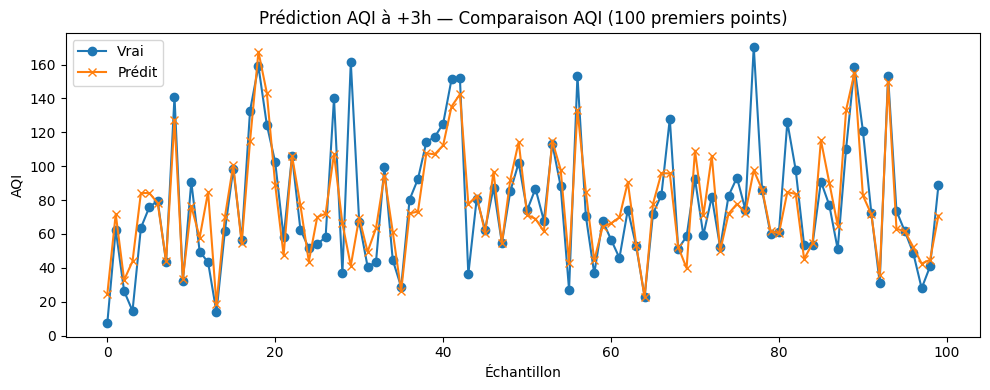

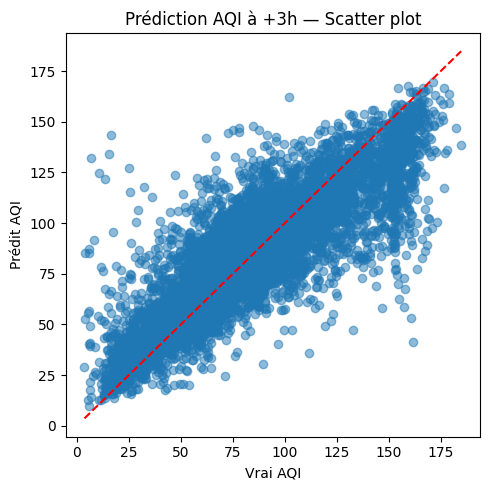

In [9]:
# ================== MODELE 3h ==================
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y_3h, test_size=0.2, random_state=42)
model_3h = RandomForestRegressor(n_estimators=200, random_state=42)
model_3h.fit(X_train3, y_train3)
pred_3h = model_3h.predict(X_test3)
evaluate_model(y_test3, pred_3h, "Prédiction AQI à +3h")


Prédiction AQI à +6h
  RMSE : 21.74
  MAE  : 15.98
  R²   : 0.658


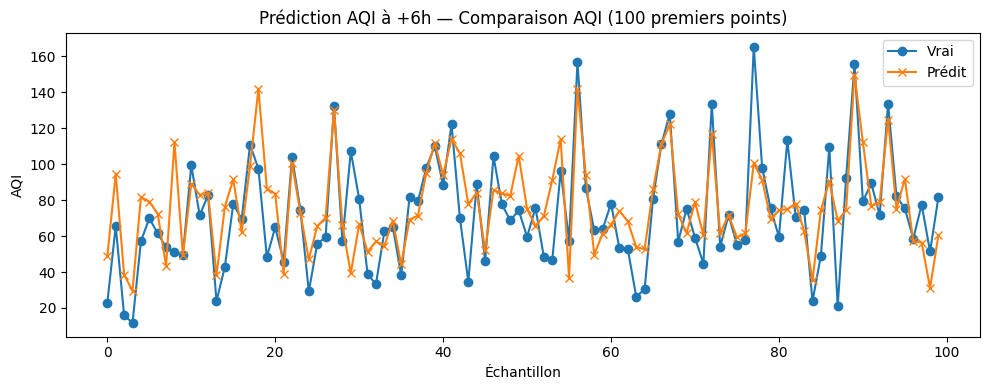

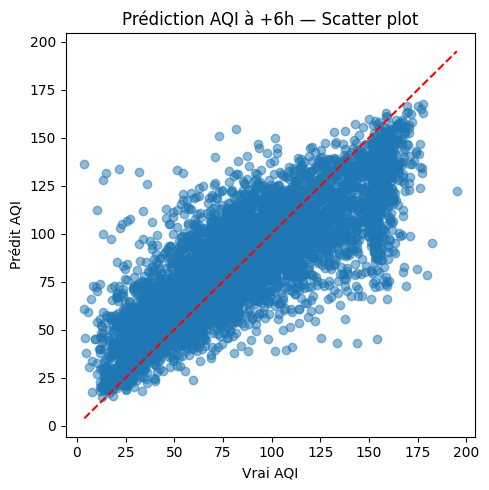

In [10]:
# ================== MODELE 6h ==================
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y_6h, test_size=0.2, random_state=42)
model_6h = RandomForestRegressor(n_estimators=200, random_state=42)
model_6h.fit(X_train6, y_train6)
pred_6h = model_6h.predict(X_test6)
evaluate_model(y_test6, pred_6h, "Prédiction AQI à +6h")

In [11]:
# Exemple de prédiction future
sample = X_test3.iloc[[0]]
print("\nExemple de prédictions :")
print("  AQI prévu dans 3h :", model_3h.predict(sample)[0])
print("  AQI prévu dans 6h :", model_6h.predict(sample)[0])


Exemple de prédictions :
  AQI prévu dans 3h : 24.542347734709367
  AQI prévu dans 6h : 48.90993514434685
